<font color='red'> TODO: Comment </font>

In [1]:
#Feyza EKSEN
#504201522
#########################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
bin_count = 50 #number of bins for histograms
seed = 314
random.seed(seed)

## Part A: Examine training sets

### A.1

In [3]:
df1 = pd.read_csv("train1.csv") 
df2 = pd.read_csv("train2.csv")
print(f"{df1.keys()} number of classes: {df1['y'].nunique()}\ndf1 {df1}\n\n")
print(f"{df2.keys()} number of classes: {df2['y'].nunique()}\ndf2 {df2}\n\n")

Index(['Unnamed: 0', 'x1', 'x2', 'y'], dtype='object') number of classes: 2
df1       Unnamed: 0        x1        x2    y
0              0  1.143987  0.339646  0.0
1              1  2.284493  1.129224  0.0
2              2  1.053601  0.573296  0.0
3              3 -0.652288  3.116746  1.0
4              4 -0.223255  3.463650  1.0
...          ...       ...       ...  ...
1595        1595 -1.415131  3.226519  1.0
1596        1596  1.645863  1.057249  0.0
1597        1597 -1.575476  3.638737  1.0
1598        1598  0.790778  0.626050  0.0
1599        1599 -0.292451  0.269355  0.0

[1600 rows x 4 columns]


Index(['Unnamed: 0', 'x1', 'x2', 'y'], dtype='object') number of classes: 2
df2       Unnamed: 0        x1        x2    y
0              0  1.941228  1.846020  0.0
1              1  1.495839  2.698817  0.0
2              2  4.330579  4.413520  1.0
3              3  2.737539  2.038206  0.0
4              4  3.819236  4.541018  1.0
...          ...       ...       ...  ...
1995        199

### A.2

In [4]:
def calculate_cov_mtrx(n_features, n_samples, values_mtrx):
    means_mtrx = np.empty((n_features))
    
    for x in range(n_features):
        means_mtrx[x] = np.mean(values_mtrx[x])

    cov_mtrx = np.empty((n_features, n_features))
    
    for i in range(n_features):
        for k in range(n_features):
            total_sum = 0.0
            for j in range(n_samples):
                total_sum += (values_mtrx[i][j] - means_mtrx[i]) * (values_mtrx[k][j] - means_mtrx[k])
                
            cov_mtrx[i][k] = total_sum / n_samples
    return cov_mtrx, means_mtrx

In [5]:
def cov_mtrx_class(df, class_number):
    df_class = df[df['y']==class_number]
    n_samples = len(df_class)

    n_features = 2
    df_class_x1_values = df_class['x1'].values
    df_class_x2_values = df_class['x2'].values
    
    values_mtrx = np.zeros((n_features, n_samples))
    values_mtrx[0] = df_class_x1_values
    values_mtrx[1] = df_class_x2_values

    cov_mtrx_df_class, means_mtrx_df_class = calculate_cov_mtrx(n_features, n_samples, values_mtrx)
    return cov_mtrx_df_class, means_mtrx_df_class

In [6]:
### DATASET 1 ###

# CLASS 0 
cov_mtrx_df1_class0, means_mtrx_df1_class0 = cov_mtrx_class(df1, class_number=0)
print(f"Dataset 1 Class 0\nMean Vector {means_mtrx_df1_class0}\nCovariance Matrix\n{cov_mtrx_df1_class0}\n\n")


# CLASS 1
cov_mtrx_df1_class1, means_mtrx_df1_class1 = cov_mtrx_class(df1, class_number=1)
print(f"Dataset 1 Class 1\nMean Vector {means_mtrx_df1_class1}\nCovariance Matrix\n{cov_mtrx_df1_class1}\n\n")


### DATASET 2 ###

# CLASS 0 
cov_mtrx_df2_class0, means_mtrx_df2_class0 = cov_mtrx_class(df2, class_number=0)
print(f"Dataset 2 Class 0\nMean Vector {means_mtrx_df2_class0}\nCovariance Matrix\n{cov_mtrx_df2_class0}\n\n")


# CLASS 1
cov_mtrx_df2_class1, means_mtrx_df2_class1 = cov_mtrx_class(df2, class_number=1)
print(f"Dataset 2 Class 1\nMean Vector {means_mtrx_df2_class1}\nCovariance Matrix\n{cov_mtrx_df2_class1}\n\n")

Dataset 1 Class 0
Mean Vector [1.18814556 0.74442316]
Covariance Matrix
[[ 0.650795   -0.01941708]
 [-0.01941708  0.36460863]]


Dataset 1 Class 1
Mean Vector [-1.38466842  3.07103112]
Covariance Matrix
[[0.41268323 0.01332061]
 [0.01332061 1.49317904]]


Dataset 2 Class 0
Mean Vector [1. 1.]
Covariance Matrix
[[ 1.29822505e+00 -3.20280558e-05]
 [-3.20280558e-05  1.29917512e+00]]


Dataset 2 Class 1
Mean Vector [4.5 3. ]
Covariance Matrix
[[ 8.99078225e-01 -1.96318696e-05]
 [-1.96318696e-05  8.99121776e-01]]




In [7]:
def plot_cov_mtrx(cov_mtrx_data, dataset_number):
    feature_names = ["x1", "x2"]
    
    fig2, axs2 = plt.subplots(1, 2, figsize=(17,4))
    caxs2 = [0,0,0,0]
    plt.tight_layout(pad=5.0)
    
    plot_i = 0
    titles = [r"Dataset " + str(dataset_number) + " Class 0",
              r"Dataset " + str(dataset_number) + " Class 1"
             ]
    
    for plot_i, plot_data in enumerate(cov_mtrx_data):
        axs2[plot_i].title.set_text(titles[plot_i])
        caxs2[plot_i] = axs2[plot_i].matshow(plot_data, cmap="viridis")
        cb = fig2.colorbar(caxs2[plot_i], ax=axs2[plot_i])
        
        axs2[plot_i].set_xticklabels(feature_names)
        axs2[plot_i].set_xticks(range(len(feature_names)))
        axs2[plot_i].set_yticklabels(feature_names)
        axs2[plot_i].set_yticks(range(len(feature_names)))

    plt.show()

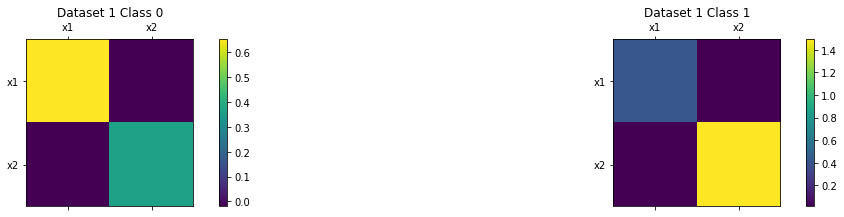

In [8]:
df1_cov_mtrx_data = [cov_mtrx_df1_class0, cov_mtrx_df1_class1]
plot_cov_mtrx(df1_cov_mtrx_data, dataset_number=1)

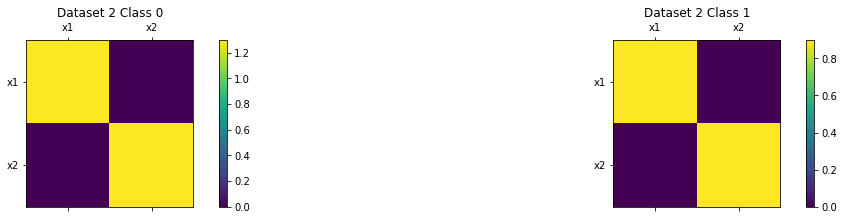

In [ ]:
df2_cov_mtrx_data = [cov_mtrx_df2_class0, cov_mtrx_df2_class1]
plot_cov_mtrx(df2_cov_mtrx_data, dataset_number=2)

<font color='red'> TODO: Interpret  </font>

### A.3

In [ ]:
def get_classes_from_dataset_and_feature(df, feature_name):    
    df_class_0 = df[df['y']==0]
    df_class_0_values = df_class_0[feature_name].values
    
    df_class_1 = df[df['y']==1]
    df_class_1_values = df_class_1[feature_name].values
    
    return df_class_0_values, df_class_1_values

In [ ]:
def plot_overlaid_dist(class_0, class_1, dataset_number, feature_name):
    min_0 = np.min(class_0)
    min_1 = np.min(class_1)
    min_min = min(min_0, min_1)
    
    max_0 = np.max(class_0)
    max_1 = np.max(class_1)
    max_max = max(max_0, max_1)
    
    bins = np.linspace(min_min, max_max, bin_count)
    plt.title(f"Dataset {dataset_number} Feature {feature_name}")
    plt.xlabel("Feature Value")
    plt.ylabel("Frequency")
    plt.hist(class_0, bins, color = 'r', alpha=.4, label= 'c0')
    plt.hist(class_1, bins, color = 'b', alpha=.4, label= 'c1')
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
### DATASET 1 ###

# FEATURE x1
df1_x1_class_0, df1_x1_class_1 = get_classes_from_dataset_and_feature(df1, feature_name="x1")
plot_overlaid_dist(df1_x1_class_0, df1_x1_class_1, dataset_number=1, feature_name="x1")


# FEATURE x2
df1_x2_class_0, df1_x2_class_1 = get_classes_from_dataset_and_feature(df1, feature_name="x2")
plot_overlaid_dist(df1_x2_class_0, df1_x2_class_1, dataset_number=1, feature_name="x2")


### DATASET 2 ###

# FEATURE x1
df2_x1_class_0, df2_x1_class_1 = get_classes_from_dataset_and_feature(df2, feature_name="x1")
plot_overlaid_dist(df2_x1_class_0, df2_x1_class_1, dataset_number=2, feature_name="x1")


# FEATURE x2
df2_x2_class_0, df2_x2_class_1 = get_classes_from_dataset_and_feature(df2, feature_name="x2")
plot_overlaid_dist(df2_x2_class_0, df2_x2_class_1, dataset_number=2, feature_name="x2")

<font color='red'> TODO: Interpret  </font>

### A.4

In [ ]:
def plot_scatter(x1_class_0, x2_class_0, x1_class_1, x2_class_1, dataset_number):
    plt.title(f"Dataset {dataset_number}")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.scatter(x1_class_0, x2_class_0, color = 'r', alpha=.4, label= 'c0')
    plt.scatter(x1_class_1, x2_class_1, color = 'b', alpha=.4, label= 'c1')
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
### DATASET 1 ###
plot_scatter(df1_x1_class_0, df1_x2_class_0, df1_x1_class_1, df1_x2_class_1, dataset_number=1)


### DATASET 2 ###
plot_scatter(df2_x1_class_0, df2_x2_class_0, df2_x1_class_1, df2_x2_class_1, dataset_number=2)

<font color='red'> TODO: Interpret ?  </font>

## Part B: Evaluation of Bayes classifier using random single dataset

### B.1

In [ ]:
### DATASET 1 ###

# CLASS 0 
print(f"Dataset 1 Class 0\nMean Vector {means_mtrx_df1_class0}\nCovariance Matrix\n{cov_mtrx_df1_class0}\n\n")

# CLASS 1
print(f"Dataset 1 Class 1\nMean Vector {means_mtrx_df1_class1}\nCovariance Matrix\n{cov_mtrx_df1_class1}\n\n")

### DATASET 2 ###

# CLASS 0 
print(f"Dataset 2 Class 0\nMean Vector {means_mtrx_df2_class0}\nCovariance Matrix\n{cov_mtrx_df2_class0}\n\n")

# CLASS 1
print(f"Dataset 2 Class 1\nMean Vector {means_mtrx_df2_class1}\nCovariance Matrix\n{cov_mtrx_df2_class1}\n\n")

### B.2

<font color='red'> TODO: Implement and then compare it with the built in function, Implement Case 1!!!  </font>

### Case 1

### Case 2

In [ ]:
def calculate_prior_probs(df):
    total = len(df)
    
    df_class_0 = df[df['y']==0]
    p_0 = len(df_class_0) / total
    
    df_class_1 = df[df['y']==1]
    p_1 = len(df_class_1) / total
    
    return p_0, p_1

In [ ]:
def train_bayes(mean_mtrx, cov_mtrx, prior_prob, class_number, cov_matrix_equals=False):
    if cov_matrix_equals:
        pass # TODO:
    else: # general case
        g_x = np.empty((3, 2, 2))
        cov_mtrx_inverse = np.linalg.inv(cov_mtrx)
        
        W = -1/2 * cov_mtrx_inverse
        w = mean_mtrx * cov_mtrx_inverse
        w_0 = -1/2 * mean_mtrx * cov_mtrx_inverse * mean_mtrx - 1/2 * np.log(np.linalg.det(cov_mtrx_inverse)) + np.log(prior_prob)
        
        g_x[0] = W
        g_x[1] = w
        g_x[2] = w_0
        
    return g_x

In [ ]:
def predict_class(x, discr_func_class0, discr_func_class1):
    result_class0 = np.sum(np.matmul(np.matmul(x, discr_func_class0[0]), np.transpose(x)) + np.matmul(discr_func_class0[1], np.transpose(x)) + discr_func_class0[2])
    
    result_class1 = np.sum(np.matmul(np.matmul(x, discr_func_class1[0]), np.transpose(x)) + np.matmul(discr_func_class1[1], np.transpose(x)) + discr_func_class1[2])
    
    if result_class0 - result_class1 > pow(10, -3):
        predicted_class = 0
    else:
        predicted_class = 1
        
    return predicted_class

In [ ]:
def train_naive_bayes(p0, p1, means_mtrx_class0, means_mtrx_class1, cov_mtrx_class0, cov_mtrx_class1):    
    # CLASS 0
    g_x_class_0 = train_bayes(means_mtrx_class0, cov_mtrx_class0, p_0, class_number=0, cov_matrix_equals=False)

    # CLASS 1
    g_x_class_1 = train_bayes(means_mtrx_class1, cov_mtrx_class1, p_1, class_number=1, cov_matrix_equals=False)
    
    return g_x_class_0, g_x_class_1

In [ ]:
def calculate_error(x_values, y_values, discr_func_class0, discr_func_class1):
    n_samples = len(x_values)
    missed = 0

    for i in range(n_samples):
        x, y = x_values[i], int(y_values[i][0])

        pred = predict_class(x, discr_func_class0, discr_func_class1)    

        #print(f"predicted {pred} label {y}")

        if pred != y:
            missed += 1
    e =  (missed / n_samples) * 100
    print(f"classification error rate {e}")
    
    return e

In [ ]:
### DATASET 1 ###
p_0, p_1 = calculate_prior_probs(df1)
print(f"Prior probabilities of class 0 is {p_0} class 1 is {p_1}")
df1_discr_func_class0, df1_discr_func_class1 = train_naive_bayes(p_0, p_1, means_mtrx_df1_class0, means_mtrx_df1_class1, cov_mtrx_df1_class0, cov_mtrx_df1_class1)
print(f"Discriminant function for class 0\n{df1_discr_func_class0}\nDiscriminant function for class 1\n{df1_discr_func_class1}")

df1_x_values = df1[['x1', 'x2']].values
df1_y_values = df1[['y']].values
calculate_error(df1_x_values, df1_y_values, df1_discr_func_class0, df1_discr_func_class1)

In [ ]:
### DATASET 2 ###
p_0, p_1 = calculate_prior_probs(df2)
print(f"Prior probabilities of class 0 is {p_0} class 1 is {p_1}")
df2_discr_func_class0, df2_discr_func_class1 = train_naive_bayes(p_0, p_1, means_mtrx_df2_class0, means_mtrx_df2_class1, cov_mtrx_df2_class0, cov_mtrx_df2_class1)
print(f"Discriminant function for class 0\n{df2_discr_func_class0}\nDiscriminant function for class 1\n{df2_discr_func_class1}")

df2_x_values = df2[['x1', 'x2']].values
df2_y_values = df2[['y']].values
calculate_error(df2_x_values, df2_y_values, df2_discr_func_class0, df2_discr_func_class1)

### B.3

In [ ]:
df_test1 = pd.read_csv("test1.csv") 
df_test2 = pd.read_csv("test2.csv")
print(f"{df_test1.keys()} number of classes: {df_test1['y'].nunique()}\ndf_test1 {df_test1}\n\n")
print(f"{df_test2.keys()} number of classes: {df_test2['y'].nunique()}\ndf_test2 {df_test2}\n\n")

In [ ]:
### TEST DATASET 1 ###
df_test1_x_values = df_test1[['x1', 'x2']].values
df_test1_y_values = df_test1[['y']].values
calculate_error(df_test1_x_values, df_test1_y_values, df1_discr_func_class0, df1_discr_func_class1)

In [ ]:
### TEST DATASET 2 ###
df_test2_x_values = df_test2[['x1', 'x2']].values
df_test2_y_values = df_test2[['y']].values
calculate_error(df_test2_x_values, df_test2_y_values, df2_discr_func_class0, df2_discr_func_class1)

## Part C: Evaluation of Bayes classifier using 3-fold cross-validation

### C.1

In [ ]:
df_all1 = pd.concat([df1, df_test1])
df_all2 = pd.concat([df2, df_test2])
print(f"{df_all1.keys()} number of classes: {df_all1['y'].nunique()}\ndf_all1 {df_all1}\n\n")
print(f"{df_all2.keys()} number of classes: {df_all2['y'].nunique()}\ndf_all2 {df_all2}\n\n")

### C.2

In [ ]:
### COMBINED DATASET 1 ###

# CLASS 0 
cov_mtrx_df_all1_class0, means_mtrx_df_all1_class0 = cov_mtrx_class(df_all1, class_number=0)
print(f"Combined Dataset 1 Class 0\nMean Vector {means_mtrx_df_all1_class0}\nCovariance Matrix\n{cov_mtrx_df_all1_class0}\n\n")


# CLASS 1
cov_mtrx_df_all1_class1, means_mtrx_df_all1_class1 = cov_mtrx_class(df_all1, class_number=1)
print(f"Combined Dataset 1 Class 1\nMean Vector {means_mtrx_df_all1_class1}\nCovariance Matrix\n{cov_mtrx_df_all1_class1}\n\n")


### COMBINED DATASET 2 ###

# CLASS 0 
cov_mtrx_df_all2_class0, means_mtrx_df_all2_class0 = cov_mtrx_class(df_all2, class_number=0)
print(f"Combined Dataset 2 Class 0\nMean Vector {means_mtrx_df_all2_class0}\nCovariance Matrix\n{cov_mtrx_df_all2_class0}\n\n")


# CLASS 1
cov_mtrx_df_all2_class1, means_mtrx_df_all2_class1 = cov_mtrx_class(df_all2, class_number=1)
print(f"Combined Dataset 2 Class 1\nMean Vector {means_mtrx_df_all2_class1}\nCovariance Matrix\n{cov_mtrx_df_all2_class1}\n\n")

In [ ]:
### COMBINED DATASET 1 ###
p_0, p_1 = calculate_prior_probs(df_all1)
print(f"Prior probabilities of class 0 is {p_0} class 1 is {p_1}")
df_all1_discr_func_class0, df_all1_discr_func_class1 = train_naive_bayes(p_0, p_1, means_mtrx_df_all1_class0, means_mtrx_df_all1_class1, cov_mtrx_df_all1_class0, cov_mtrx_df_all1_class1)
print(f"Discriminant function for class 0\n{df_all1_discr_func_class0}\nDiscriminant function for class 1\n{df_all1_discr_func_class1}")

df_all1_x_values = df_all1[['x1', 'x2']].values
df_all1_y_values = df_all1[['y']].values
calculate_error(df_all1_x_values, df_all1_y_values, df_all1_discr_func_class0, df_all1_discr_func_class1)

In [ ]:
### COMBINED DATASET 2 ###
p_0, p_1 = calculate_prior_probs(df_all2)
print(f"Prior probabilities of class 0 is {p_0} class 1 is {p_1}")
df_all2_discr_func_class0, df_all2_discr_func_class1 = train_naive_bayes(p_0, p_1, means_mtrx_df_all2_class0, means_mtrx_df_all2_class1, cov_mtrx_df_all2_class0, cov_mtrx_df_all2_class1)
print(f"Discriminant function for class 0\n{df_all2_discr_func_class0}\nDiscriminant function for class 1\n{df_all2_discr_func_class1}")

df_all2_x_values = df_all2[['x1', 'x2']].values
df_all2_y_values = df_all2[['y']].values
calculate_error(df_all2_x_values, df_all2_y_values, df_all2_discr_func_class0, df_all2_discr_func_class1)

In [ ]:
### COMBINED DATASET 1 ###
n_features = 2

X = df_all1[['x1', 'x2']].values
y = df_all1[['y']].values

kf = KFold(n_splits=3)
print(f"{kf}\n")
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    n_samples = X_train.shape[0]
    values_mtrx_class0 = X_train.reshape(-1, n_samples)
    
    values_mtrx_class1 = values_mtrx_class0 # TODO: do this for class0 and class1 separately

    cov_mtrx_df_class0, means_mtrx_df_class0 = calculate_cov_mtrx(n_features, n_samples, values_mtrx_class0)
    
    cov_mtrx_df_class1, means_mtrx_df_class1 = calculate_cov_mtrx(n_features, n_samples, values_mtrx_class1)
    
    p_0, p_1 = 0.5, 0.5 # TODO: calculate_prior_probs(df_all2)
    print(f"Prior probabilities of class 0 is {p_0} class 1 is {p_1}")
    discr_func_class0, discr_func_class1 = train_naive_bayes(p_0, p_1, means_mtrx_df_class0, means_mtrx_df_class1, cov_mtrx_df_class0, cov_mtrx_df_class1)
    print(f"Discriminant function for class 0\n{discr_func_class0}\nDiscriminant function for class 1\n{discr_func_class1}")
    
    e1 = calculate_error(X_test, y_test, discr_func_class0, discr_func_class1)
    
    print("\n")

### C.3

### C.4